In [18]:
# Import Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error

In [2]:
# Load Data
# df = pd.read_csv(".csv")

df = sns.load_dataset("tips")

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
df.shape

(244, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
df.duplicated().sum()

1

<ipython-input-31-96cad5e9df76>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Text(0.5, 1.0, 'Correlation Matrix')

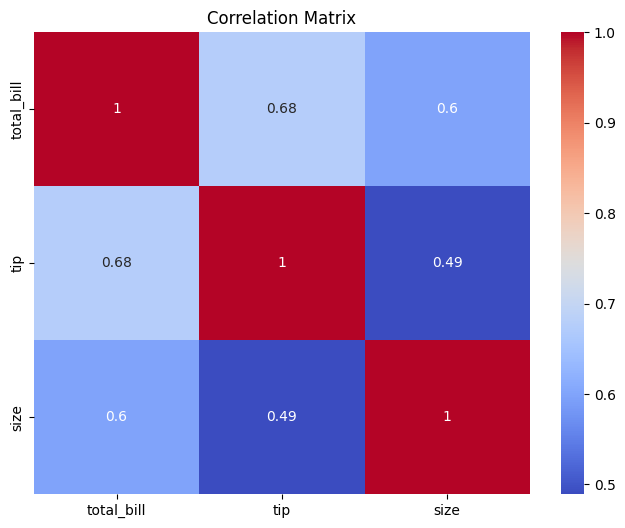

In [31]:
# Check Correlation
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")


In [10]:
# Split your data into features (X) and targets (y):

x = df[['total_bill']]  # Replace 'feature_column' with your actual feature column name
y = df['tip']      # Replace 'target_column' with your actual target column name

# If your dataset has multiple features, you can include them in X accordingly e.g., x = df[['total_bill', 'size']]

In [11]:
# Divide your data into training and testing sets to evaluate your model's performance:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# test_size=0.2 means 20% of the data will be used for testing, and the remaining 80% will be used for training.

In [12]:
# Create a LinearRegression model and train it using your training data:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Use the trained model to make predictions on the test data:
y_pred = model.predict(X_test)


**Mean Squared Error (MSE):**
MSE measures the average squared difference between the actual and predicted values.
It gives more weight to larger errors. A lower MSE indicates a better model fit.

**Mean Absolute Error (MAE):**
MAE calculates the average absolute difference between the actual and predicted values.
It treats all errors equally and is less sensitive to outliers compared to MSE.

**Root Mean Squared Error (RMSE):**
RMSE is the square root of the MSE. It represents the typical magnitude of errors in the model's predictions.
Like MSE, a lower RMSE indicates a better model fit.


In [20]:
# Evaluate the Model:
# Calculate Mean Squared Error, Mean Absolute Error, and Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 0.5688142529229536
Mean Absolute Error: 0.6208580000398983
Root Mean Squared Error: 0.7541977545199625


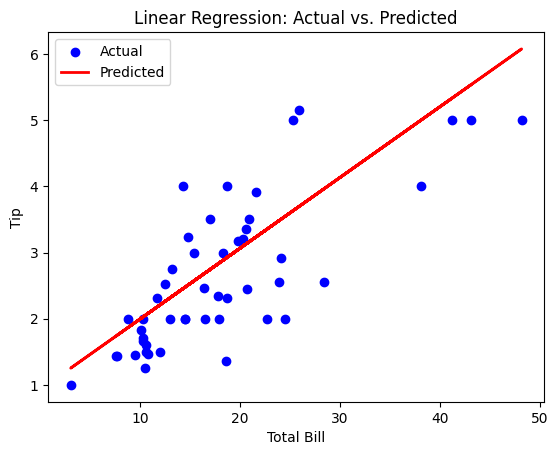

In [21]:
# Plot your actual vs. predicted values to visually assess the model's performance:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Linear Regression: Actual vs. Predicted")
plt.legend()

Text(0, 0.5, 'Frequency')

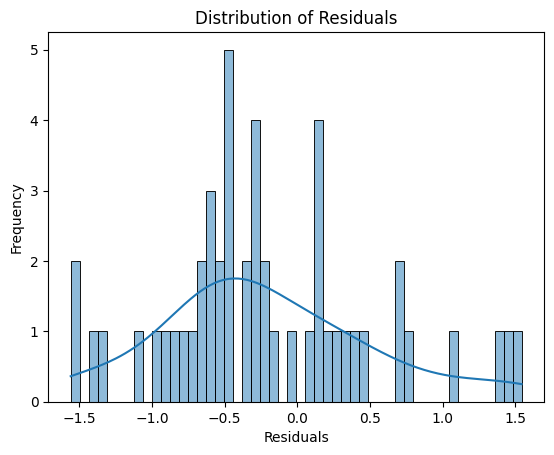

In [29]:
# Residual Analysis
# Residuals are the differences between the actual target values and the predicted values.
# If the residuals are normally distributed, it suggests that the model is capturing the underlying relationships between the features and the target variable correctly.

# Calculate the residuals (difference between y_test and predictions)
residuals = y_test - y_pred

# Create a histogram plot of residuals with KDE
sns.histplot(residuals, bins=50, kde=True)

# Set the title and labels for the plot
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")


A positive coefficient means that as the feature value increases, the predicted target value also increases.
A negative coefficient means the opposite: as the feature value increases, the predicted target value decreases.

For example:
- A positive coefficient of 0.5 for a feature means that a one-unit increase in the feature leads to a predicted target increase of 0.5 units.
- A negative coefficient of -0.3 means that a one-unit increase in the feature leads to a predicted target decrease of 0.3 units.

Intercept:
The intercept is the value of the predicted target variable when all features are at their lowest or nonexistent values.
It represents the baseline prediction made by the model when no features are present.

For example:
If the intercept is 2.0, it means that when all features are zero, the model predicts a target value of 2.0.


In [16]:
# Interpret the Model:
coef = model.coef_
intercept = model.intercept_
print("Coefficients:", coef)
print("Intercept:", intercept)

Coefficients: [0.10696371]
Intercept: 0.925235558557056


In [30]:
# Additional Information: R-squared
# R-squared measures the proportion of the variance in the target variable that's predictable from the feature(s)
# 0 to 1): Proportion of target's variability explained by the model's features.
r_squared = model.score(X_test, y_test)
print("R-squared:", r_squared)

R-squared: 0.5449381659234664
